# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

You can install this package by running in a terminal (you can also open it within Jupyter)

` pip install imageio `

In [2]:
import imageio

The following library is used to clean the output of a Jupyter cell

In [3]:
import IPython.display as jpt

# Define the image to learn

In [4]:
img = imageio.imread('smile.png')

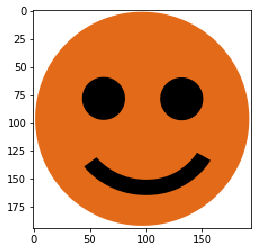

In [5]:
plt.imshow(img)
plt.show()

In [6]:
np.shape(img)

(194, 194, 4)

In [7]:
# Select only b/w channel of the image (imagesd with colors have other 3 channels (rgb))
img = img[:,:,0]

# Normalize between 0 and 1
img -= img.min()
img = img.astype(dtype='float')/img.max()

img_size = np.shape(img)[0]

def Function(x,y):
    # Map a real input between 0 and 1 to a pixel (between 0 and img_size-1)
    # We multiply by 0.9999 just to exclude the last value...
    x_int = (x*img_size*0.9999).astype(dtype='int')
    y_int = (y*img_size*0.9999).astype(dtype='int')
    return img[x_int,y_int].reshape([-1,1])

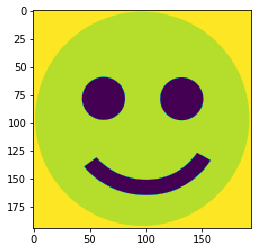

In [8]:
plt.imshow(img)
plt.show()

In [9]:
def get_batch(batchsize):
    y_in = np.random.uniform(low=0, high=1, size=[batchsize,2])
    f_out = Function(y_in[:,0],y_in[:,1])
    return (y_in, f_out)

# Define the neural network

In [10]:
nL = [2,150,150,100,1]
L = len(nL) - 1 # we do not consider the input as a layer

w = [np.random.uniform(low=-0.1,high=0.1,size=[nL[l+1],nL[l]]) for l in range(0,L)]
b = [np.zeros(nL[l+1]) for l in range(0,L)]

In [11]:
# ReLU activation function
def sigmoid_ddz(z):
    val=z*(z>0)
    return val,z>0 

def sigmoid_ddz_last(z):
    val=z
    return val,1 

def apply_layer(y_in, w, b, f):
    z = np.dot(y_in, w.transpose()) + b
    return f(z)

def forward(y_in):
    y[0] = y_in

    for l in range(0,L-1):
        (y_in, df_dz[l]) = apply_layer(y_in, w[l], b[l], sigmoid_ddz)
        y[l+1] = y_in
    
    (y_in, df_dz[L-1]) = apply_layer(y_in, w[L-1], b[L-1], sigmoid_ddz_last)
    y[L] = y_in
        
    return y_in

In [12]:
def C(y_out,f_out):
    return 0.5*np.mean(np.sum((f_out-y_out)**2,axis=-1))

Delta = [np.zeros(0) for l in range(0, L)]
df_dz = [np.zeros(0) for l in range(0, L)]
y = [np.zeros(nL[l]) for l in range(0, L + 1)]

dw = [np.zeros([nL[l+1], nL[l]]) for l in range(0, L)]
db = [np.zeros(nL[l+1]) for l in range(0, L)]

def backward(y_in, y_out, f_out):
    batchsize = len(y_in)
    Delta[-1]= (y_out - f_out)*df_dz[-1]
    
    dw[-1] = np.dot(Delta[-1].transpose(), y[-2])/batchsize
    db[-1] = np.sum(Delta[-1], axis=0)/batchsize
    
    for l in range(0,L-1):
        M = np.dot(Delta[-1-l], w[-1-l])
        Delta[-2-l] =M*df_dz[-2-l]
        
        dw[-2-l] = np.dot(Delta[-2-l].transpose(), y[-3-l])/batchsize
        db[-2-l] = np.sum(Delta[-2-l], axis=0)/batchsize

In [13]:
def train(batchsize, eta = 0.1):
    y_in, f_out = get_batch(batchsize)
    y_out = forward(y_in)
    
    backward(y_in,y_out,f_out)
    
    for l in range(0, L):
        w[l]-= eta*dw[l]
        b[l]-= eta*db[l]
        
    return C(y_out,f_out)

In [14]:
def plot_sampled_output():
    x_start = 0
    x_end = 1
    
    y_start = 0
    y_end = 1
    
    Mx = 50
    x_in = np.linspace(x_start,x_end,Mx)
    
    My = 50
    y_in = np.linspace(y_start,y_end,My)
    
    x_test, y_test = np.meshgrid(x_in, y_in)
    
    net_in = np.array([x_test.flatten(),y_test.flatten()]).transpose()
    f_out = forward(net_in)
    f_out = f_out.reshape([My,Mx])
    
    f_true = Function(x_test,y_test)
    
    fig = plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.contourf(x_test,y_test,np.flipud(f_true.reshape([My,Mx]).transpose()))
    plt.title("Real function")
    plt.gca().set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    
    plt.subplot(1,2,2)
    plt.contourf(x_test,y_test,np.flipud(f_out.transpose()))
    plt.title("Approximated function")
    plt.gca().set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    
    
    plt.show()

# Train the network

In [15]:
costs=[]
N_batch = 40000
batchsize = 500
eta = 0.5

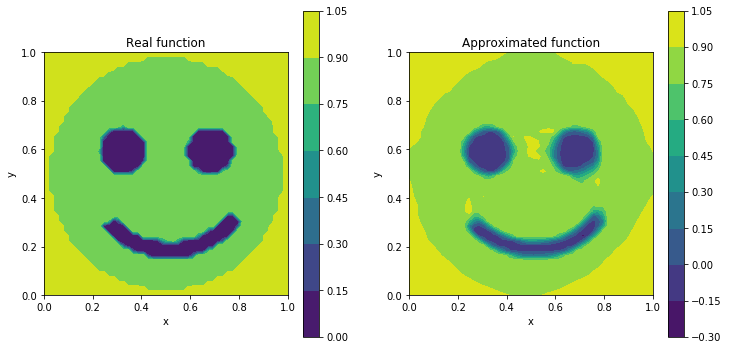

Training: 39000/40000,	Cost = 0.0029489
Network has been trained: final cost 5.1572182212e-03
Did we overfit?


In [16]:
for k in range(N_batch):
    costs.append(train(batchsize, eta))
    
    if k%(int(N_batch/40)) == 0:
        jpt.clear_output(wait=True)
        plot_sampled_output()
        print("Training: %d/%d,\tCost = %2.7f" % (k,N_batch,costs[-1]))
        
print("Network has been trained: final cost %.10e" %costs[-1])
print("Did we overfit?")

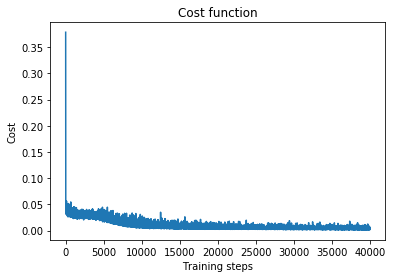

In [17]:
plt.figure()
plt.title("Cost function")
plt.plot(costs)
plt.xlabel("Training steps")
plt.ylabel("Cost")
plt.show()

# Evaluate the model and plot the results

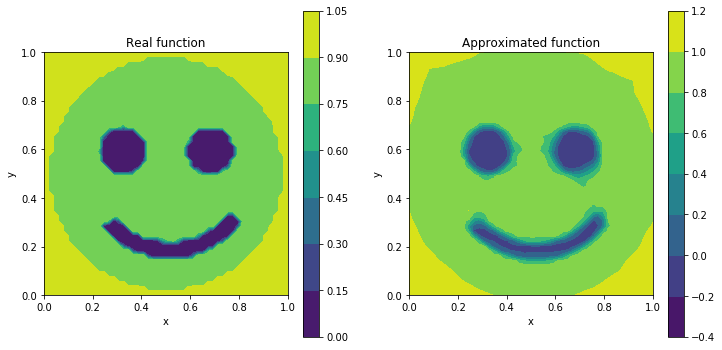

In [18]:
plot_sampled_output()

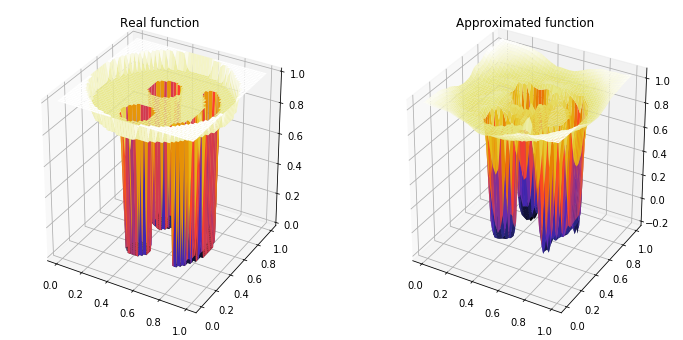

In [19]:
x_start = 0
x_end = 1

y_start = 0
y_end = 1

Mx = 50
x_in = np.linspace(x_start,x_end,Mx)

My = 50
y_in = np.linspace(y_start,y_end,My)

x_test, y_test = np.meshgrid(x_in, y_in)

net_in = np.array([x_test.flatten(),y_test.flatten()]).transpose()
f_out = forward(net_in)
f_out = f_out.reshape([My,Mx])

f_true = Function(x_test,y_test)

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(1,2,1,projection="3d")
plt.title("Real function")
ax.plot_surface(x_test,y_test,f_true.reshape([My,Mx]), cmap=plt.cm.CMRmap)

ax = fig.add_subplot(1,2,2, projection="3d")
plt.title("Approximated function")
ax.plot_surface(x_test,y_test,f_out, cmap=plt.cm.CMRmap)
plt.show()